<a href="https://colab.research.google.com/github/Qasim-Shah-73/RevoultDetectFraud/blob/main/DetectFraudGRU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import GRU, Dense
from keras.optimizers import Adam
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [3]:
# Adjust the file path based on the location of your dataset
fraudsters_path = '/content/drive/MyDrive/Colab Notebooks/Applied AI/DL/FraudDataset/output.csv'
final_data = pd.read_csv(fraudsters_path)

<ipython-input-3-766464ad0c68>:3: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  final_data = pd.read_csv(fraudsters_path)


In [4]:
final_data = final_data.drop(['IS_FRAUDSTER'], axis = 1)
mapping = { 'True': 1, 'No': 0 }
final_data['is_bank_holiday'] = final_data['is_bank_holiday'].map(mapping)


In [5]:
# Extract features and target
X = final_data.iloc[:, :9].join(final_data.iloc[:, -81:])
y = final_data.iloc[:, 9]   # Target in column 9

# Convert features to NumPy array
X_array = X.values

# Normalize the data
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X_array)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)


# Print the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (838860, 90)
X_test shape: (209715, 90)
y_train shape: (838860,)
y_test shape: (209715,)


In [6]:
# Reshape data for GRU
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [8]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image, display

# Build the GRU model
model = Sequential()
model.add(GRU(units=32, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(units=1))

model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error')


In [ ]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
26215/26215 [==============================] - 123s 5ms/step - loss: 0.0074 - val_loss: 0.0073
Epoch 2/10
26215/26215 [==============================] - 143s 5ms/step - loss: 0.0073 - val_loss: 0.0074
Epoch 3/10
26215/26215 [==============================] - 121s 5ms/step - loss: 0.0073 - val_loss: 0.0072
Epoch 4/10
26215/26215 [==============================] - 117s 4ms/step - loss: 0.0073 - val_loss: 0.0074
Epoch 5/10
26215/26215 [==============================] - 118s 5ms/step - loss: 0.0072 - val_loss: 0.0072
Epoch 6/10
26215/26215 [==============================] - 121s 5ms/step - loss: 0.0074 - val_loss: 0.0073
Epoch 7/10
26215/26215 [==============================] - 110s 4ms/step - loss: 0.0072 - val_loss: 0.0073
Epoch 8/10
26215/26215 [==============================] - 119s 5ms/step - loss: 0.0072 - val_loss: 0.0072
Epoch 9/10
26215/26215 [==============================] - 119s 5ms/step - loss: 0.0073 - val_loss: 0.0072
Epoch 10/10
26215/26215 [=====================

6554/6554 [==============================] - 13s 2ms/step


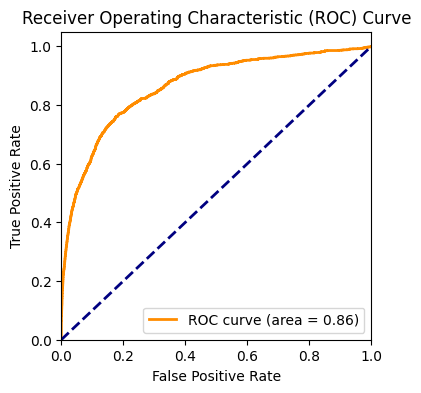

In [ ]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
# Make predictions on the test set
y_pred = model.predict(X_test)

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(4, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Confusion Matrix
threshold = 0.6  # You can adjust this threshold based on your specific needs
y_pred_binary = (y_pred > threshold).astype(int)
conf_matrix = confusion_matrix(y_test, y_pred_binary)


# Display Confusion Matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[208054     32]
 [  1553     76]]


In [ ]:
# Confusion Matrix
threshold = 0.7  # You can adjust this threshold based on your specific needs
y_pred_binary = (y_pred > threshold).astype(int)
conf_matrix = confusion_matrix(y_test, y_pred_binary)


# Display Confusion Matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[208070     16]
 [  1581     48]]


Epoch 1/10
26215/26215 [==============================] - 122s 5ms/step - loss: 0.0075 - val_loss: 0.0076
Epoch 2/10
26215/26215 [==============================] - 120s 5ms/step - loss: 0.0074 - val_loss: 0.0074
Epoch 3/10
26215/26215 [==============================] - 114s 4ms/step - loss: 0.0073 - val_loss: 0.0074
Epoch 4/10
26215/26215 [==============================] - 111s 4ms/step - loss: 0.0072 - val_loss: 0.0073
Epoch 5/10
26215/26215 [==============================] - 118s 5ms/step - loss: 0.0072 - val_loss: 0.0073
Epoch 6/10
26215/26215 [==============================] - 119s 5ms/step - loss: 0.0072 - val_loss: 0.0073
Epoch 7/10
26215/26215 [==============================] - 110s 4ms/step - loss: 0.0071 - val_loss: 0.0072
Epoch 8/10
26215/26215 [==============================] - 121s 5ms/step - loss: 0.0071 - val_loss: 0.0072
Epoch 9/10
26215/26215 [==============================] - 114s 4ms/step - loss: 0.0070 - val_loss: 0.0072
Epoch 10/10
6554/6554 [=======================

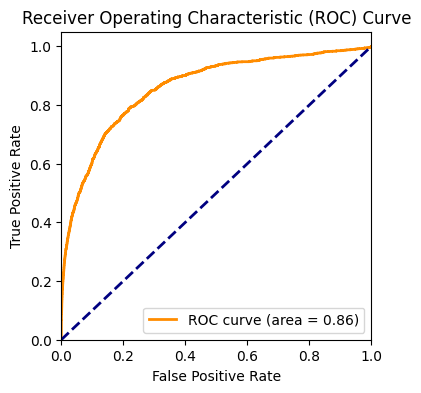

Confusion Matrix:
[[208086      0]
 [  1629      0]]
Confusion Matrix:
[[208086      0]
 [  1629      0]]


In [ ]:
# Build the GRU model
model = Sequential()
model.add(GRU(units=32, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(units=1))
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

from sklearn.metrics import roc_curve, auc, confusion_matrix
# Make predictions on the test set
y_pred = model.predict(X_test)

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(4, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Confusion Matrix
threshold = 0.6
y_pred_binary = (y_pred > threshold).astype(int)
conf_matrix = confusion_matrix(y_test, y_pred_binary)


# Display Confusion Matrix
print("Confusion Matrix:")
print(conf_matrix)

# Confusion Matrix
threshold = 0.7
y_pred_binary = (y_pred > threshold).astype(int)
conf_matrix = confusion_matrix(y_test, y_pred_binary)


# Display Confusion Matrix
print("Confusion Matrix:")
print(conf_matrix)


Epoch 1/10
26215/26215 [==============================] - 132s 5ms/step - loss: 0.0083 - val_loss: 0.0078
Epoch 2/10
26215/26215 [==============================] - 125s 5ms/step - loss: 0.0082 - val_loss: 0.0080
Epoch 3/10
26215/26215 [==============================] - 115s 4ms/step - loss: 0.0081 - val_loss: 0.0088
Epoch 4/10
26215/26215 [==============================] - 118s 4ms/step - loss: 0.0081 - val_loss: 0.0087
Epoch 5/10
26215/26215 [==============================] - 117s 4ms/step - loss: 0.0081 - val_loss: 0.0078
Epoch 6/10
26215/26215 [==============================] - 114s 4ms/step - loss: 0.0081 - val_loss: 0.0079
Epoch 7/10
26215/26215 [==============================] - 126s 5ms/step - loss: 0.0081 - val_loss: 0.0077
Epoch 8/10
26215/26215 [==============================] - 123s 5ms/step - loss: 0.0081 - val_loss: 0.0079
Epoch 9/10
26215/26215 [==============================] - 116s 4ms/step - loss: 0.0081 - val_loss: 0.0077
Epoch 10/10
6554/6554 [=======================

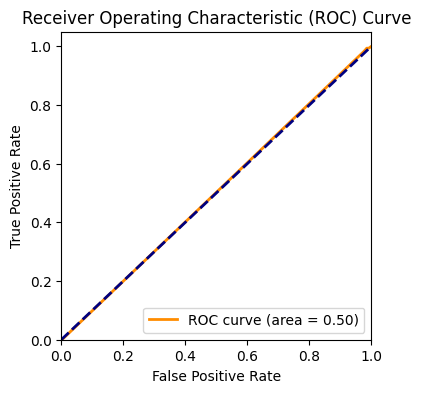

Confusion Matrix:
[[208086      0]
 [  1629      0]]
Confusion Matrix:
[[208086      0]
 [  1629      0]]


In [ ]:
# Build the GRU model
model = Sequential()
model.add(GRU(units=32, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(units=1))
model.compile(optimizer=Adam(learning_rate=0.1), loss='mean_squared_error')
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

from sklearn.metrics import roc_curve, auc, confusion_matrix
# Make predictions on the test set
y_pred = model.predict(X_test)

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(4, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Confusion Matrix
threshold = 0.6
y_pred_binary = (y_pred > threshold).astype(int)
conf_matrix = confusion_matrix(y_test, y_pred_binary)


# Display Confusion Matrix
print("Confusion Matrix:")
print(conf_matrix)

# Confusion Matrix
threshold = 0.7
y_pred_binary = (y_pred > threshold).astype(int)
conf_matrix = confusion_matrix(y_test, y_pred_binary)


# Display Confusion Matrix
print("Confusion Matrix:")
print(conf_matrix)


Epoch 1/10
26215/26215 [==============================] - 130s 5ms/step - loss: 0.0074 - val_loss: 0.0081
Epoch 2/10
26215/26215 [==============================] - 127s 5ms/step - loss: 0.0075 - val_loss: 0.0072
Epoch 3/10
26215/26215 [==============================] - 130s 5ms/step - loss: 0.0075 - val_loss: 0.0073
Epoch 4/10
26215/26215 [==============================] - 125s 5ms/step - loss: 0.0076 - val_loss: 0.0082
Epoch 5/10
26215/26215 [==============================] - 125s 5ms/step - loss: 0.0074 - val_loss: 0.0074
Epoch 6/10
26215/26215 [==============================] - 116s 4ms/step - loss: 0.0076 - val_loss: 0.0074
Epoch 7/10
26215/26215 [==============================] - 123s 5ms/step - loss: 0.0075 - val_loss: 0.0074
Epoch 8/10
26215/26215 [==============================] - 118s 4ms/step - loss: 0.0075 - val_loss: 0.0072
Epoch 9/10
26215/26215 [==============================] - 117s 4ms/step - loss: 0.0074 - val_loss: 0.0072
Epoch 10/10
6554/6554 [=======================

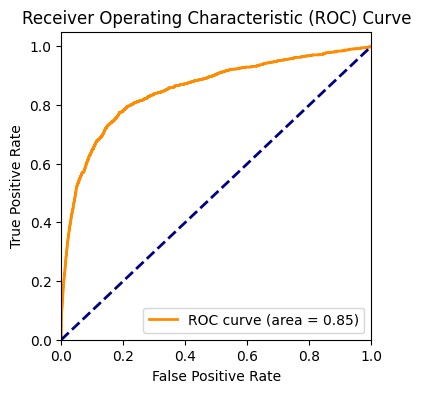

Confusion Matrix:
[[208083      3]
 [  1628      1]]
Confusion Matrix:
[[208083      3]
 [  1628      1]]


In [ ]:
# Build the GRU model
model = Sequential()
model.add(GRU(units=64, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(units=1))
model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error')
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

from sklearn.metrics import roc_curve, auc, confusion_matrix
# Make predictions on the test set
y_pred = model.predict(X_test)

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(4, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Confusion Matrix
threshold = 0.6
y_pred_binary = (y_pred > threshold).astype(int)
conf_matrix = confusion_matrix(y_test, y_pred_binary)


# Display Confusion Matrix
print("Confusion Matrix:")
print(conf_matrix)

# Confusion Matrix
threshold = 0.7
y_pred_binary = (y_pred > threshold).astype(int)
conf_matrix = confusion_matrix(y_test, y_pred_binary)


# Display Confusion Matrix
print("Confusion Matrix:")
print(conf_matrix)


Epoch 1/10
26215/26215 [==============================] - 125s 5ms/step - loss: 0.0075 - val_loss: 0.0075
Epoch 2/10
26215/26215 [==============================] - 119s 5ms/step - loss: 0.0074 - val_loss: 0.0074
Epoch 3/10
26215/26215 [==============================] - 116s 4ms/step - loss: 0.0073 - val_loss: 0.0074
Epoch 4/10
26215/26215 [==============================] - 126s 5ms/step - loss: 0.0072 - val_loss: 0.0073
Epoch 5/10
26215/26215 [==============================] - 117s 4ms/step - loss: 0.0072 - val_loss: 0.0073
Epoch 6/10
26215/26215 [==============================] - 117s 4ms/step - loss: 0.0071 - val_loss: 0.0072
Epoch 7/10
26215/26215 [==============================] - 128s 5ms/step - loss: 0.0071 - val_loss: 0.0072
Epoch 8/10
26215/26215 [==============================] - 119s 5ms/step - loss: 0.0070 - val_loss: 0.0072
Epoch 9/10
26215/26215 [==============================] - 116s 4ms/step - loss: 0.0070 - val_loss: 0.0072
Epoch 10/10
6554/6554 [=======================

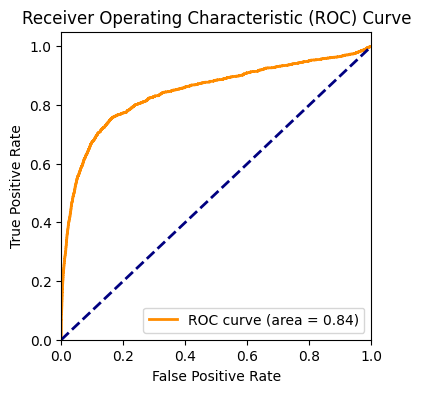

Confusion Matrix:
[[208084      2]
 [  1625      4]]
Confusion Matrix:
[[208086      0]
 [  1629      0]]


In [ ]:
 # Build the GRU model
model = Sequential()
model.add(GRU(units=64, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(units=1))
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

from sklearn.metrics import roc_curve, auc, confusion_matrix
# Make predictions on the test set
y_pred = model.predict(X_test)

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(4, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Confusion Matrix
threshold = 0.6
y_pred_binary = (y_pred > threshold).astype(int)
conf_matrix = confusion_matrix(y_test, y_pred_binary)


# Display Confusion Matrix
print("Confusion Matrix:")
print(conf_matrix)

# Confusion Matrix
threshold = 0.7
y_pred_binary = (y_pred > threshold).astype(int)
conf_matrix = confusion_matrix(y_test, y_pred_binary)


# Display Confusion Matrix
print("Confusion Matrix:")
print(conf_matrix)


Epoch 1/10
26215/26215 [==============================] - 119s 4ms/step - loss: 0.0087 - val_loss: 0.0104
Epoch 2/10
26215/26215 [==============================] - 124s 5ms/step - loss: 0.0083 - val_loss: 0.0124
Epoch 3/10
26215/26215 [==============================] - 116s 4ms/step - loss: 0.0082 - val_loss: 0.0079
Epoch 4/10
26215/26215 [==============================] - 126s 5ms/step - loss: 0.0081 - val_loss: 0.0079
Epoch 5/10
26215/26215 [==============================] - 124s 5ms/step - loss: 0.0081 - val_loss: 0.0085
Epoch 6/10
26215/26215 [==============================] - 125s 5ms/step - loss: 0.0081 - val_loss: 0.0079
Epoch 7/10
26215/26215 [==============================] - 126s 5ms/step - loss: 0.0081 - val_loss: 0.0087
Epoch 8/10
26215/26215 [==============================] - 126s 5ms/step - loss: 0.0081 - val_loss: 0.0079
Epoch 9/10
26215/26215 [==============================] - 122s 5ms/step - loss: 0.0081 - val_loss: 0.0077
Epoch 10/10
6554/6554 [=======================

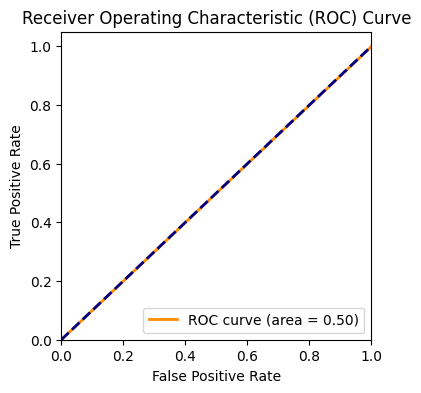

Confusion Matrix:
[[208086      0]
 [  1629      0]]
Confusion Matrix:
[[208086      0]
 [  1629      0]]


In [ ]:
 # Build the GRU model
model = Sequential()
model.add(GRU(units=64, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(units=1))
model.compile(optimizer=Adam(learning_rate=0.1), loss='mean_squared_error')
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

from sklearn.metrics import roc_curve, auc, confusion_matrix
# Make predictions on the test set
y_pred = model.predict(X_test)

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(4, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Confusion Matrix
threshold = 0.6
y_pred_binary = (y_pred > threshold).astype(int)
conf_matrix = confusion_matrix(y_test, y_pred_binary)


# Display Confusion Matrix
print("Confusion Matrix:")
print(conf_matrix)

# Confusion Matrix
threshold = 0.7
y_pred_binary = (y_pred > threshold).astype(int)
conf_matrix = confusion_matrix(y_test, y_pred_binary)


# Display Confusion Matrix
print("Confusion Matrix:")
print(conf_matrix)
